***Chest X-Ray Pneumonia prediction model***

In [22]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Setting directory path to the dataset
train_dir = '/Users/aswathsabarri/Desktop/Git Repo/Pneumonia detector/chest_xray/train'
test_dir = '/Users/aswathsabarri/Desktop/Git Repo/Pneumonia detector/chest_xray/test'

# Preprocessing the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [24]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # depends on the size of your training set
    epochs=10,            # can be adjusted
    validation_data=test_generator,
    validation_steps=50)  # depends on the size of your test set


Epoch 1/10
100/100 [==============================] - 50s 487ms/step - loss: 0.3926 - accuracy: 0.8345 - val_loss: 0.6820 - val_accuracy: 0.7740
Epoch 2/10
100/100 [==============================] - 44s 444ms/step - loss: 0.1484 - accuracy: 0.9430
Epoch 3/10
100/100 [==============================] - 40s 397ms/step - loss: 0.1329 - accuracy: 0.9485
Epoch 4/10
100/100 [==============================] - 41s 410ms/step - loss: 0.1181 - accuracy: 0.9540
Epoch 5/10
100/100 [==============================] - 37s 372ms/step - loss: 0.0915 - accuracy: 0.9685
Epoch 6/10
100/100 [==============================] - 43s 428ms/step - loss: 0.0832 - accuracy: 0.9694
Epoch 7/10
100/100 [==============================] - 38s 375ms/step - loss: 0.0900 - accuracy: 0.9704
Epoch 8/10
100/100 [==============================] - 38s 374ms/step - loss: 0.0690 - accuracy: 0.9734
Epoch 9/10
100/100 [==============================] - 37s 365ms/step - loss: 0.0601 - accuracy: 0.9785
Epoch 10/10
100/100 [==========

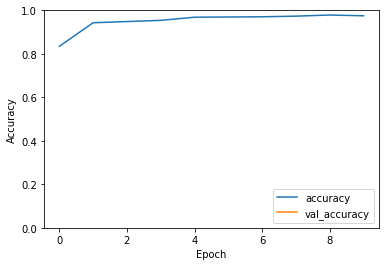

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [27]:
model.save('pneumonia_detection_model.h5')

# For prediction
from tensorflow.keras.preprocessing import image

img_path = '/Users/aswathsabarri/Desktop/Git Repo/Pneumonia detector/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print(prediction)


[[0.14047605]]


In [28]:
# Predictng All images from the val directory.  Use this block of code directly if only prediction needs to done. 
# The pretrained weights of the model is stored in 'pneumonia_detection_model.h5' file

# Acquiring all val images
predict_img_dir_normal = "/Users/aswathsabarri/Desktop/Git Repo/Pneumonia detector/chest_xray/val/NORMAL"
predict_img_dir_pneumonia = "/Users/aswathsabarri/Desktop/Git Repo/Pneumonia detector/chest_xray/val/PNEUMONIA"
images_file_normal = os.listdir(predict_img_dir_normal)
images_file_pneumonia = os.listdir(predict_img_dir_pneumonia)

# Loading saved model which has been trained - 
model = tf.keras.models.load_model('pneumonia_detection_model.h5')
test = []
pred = []

def predict_image(image_path):
    img = image.load_img(image_path,target_size=(150,150))
    img_array =  image.img_to_array(img) / 255.0   # Normalizing image values 
    img_array =  np.expand_dims(img_array, axis = 0)

    prediction = model.predict(img_array)
    return prediction[0][0]


#Iterate over all the images and predict them
print("All the images below are Normal")
for image_file in images_file_normal:
    image_path = os.path.join(predict_img_dir_normal, image_file)
    prediction_score = predict_image(image_path)
    pred_label = 'Pneumonia'
    
    test.append(0)
    if prediction_score < 0.5:
        pred_label = "Normal"
        pred.append(0)
    else:
        pred.append(1)

    print(f'Image : {image_file} | Prediction : {pred_label} | Score : {prediction_score}' )


print("\n\nAll the images below are Pnuemonic")
for image_file in images_file_pneumonia:
    image_path = os.path.join(predict_img_dir_pneumonia, image_file)
    prediction_score = predict_image(image_path)
    pred_label = 'Pneumonia'
    
    test.append(1)
    if prediction_score < 0.5:
        pred_label = "Normal"
        pred.append(0)
    else:
        pred.append(1)

    print(f'Image : {image_file} | Prediction : {pred_label} | Score : {prediction_score}' )


print(f"\n Accuracy of model {accuracy_score(test,pred)}")




All the images below are Normal
Image : NORMAL2-IM-1440-0001.jpeg | Prediction : Normal | Score : 0.0005770325660705566
Image : NORMAL2-IM-1437-0001.jpeg | Prediction : Normal | Score : 0.24535581469535828
Image : NORMAL2-IM-1431-0001.jpeg | Prediction : Normal | Score : 0.0628671646118164
Image : NORMAL2-IM-1436-0001.jpeg | Prediction : Normal | Score : 0.03877553343772888
Image : NORMAL2-IM-1430-0001.jpeg | Prediction : Pneumonia | Score : 0.9426052570343018
Image : NORMAL2-IM-1438-0001.jpeg | Prediction : Normal | Score : 0.24113687872886658
Image : NORMAL2-IM-1442-0001.jpeg | Prediction : Normal | Score : 0.0038035809993743896
Image : NORMAL2-IM-1427-0001.jpeg | Prediction : Normal | Score : 0.1404760479927063


All the images below are Pnuemonic
Image : person1950_bacteria_4881.jpeg | Prediction : Pneumonia | Score : 0.9808032512664795
Image : person1951_bacteria_4882.jpeg | Prediction : Pneumonia | Score : 0.9999854564666748
Image : person1952_bacteria_4883.jpeg | Prediction : Pn